In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Crear dataframe simulado

In [59]:
data = {
    "Fecha": pd.date_range(start="2025-01-01", periods=30, freq='D'),
    "Componente": [
        "Motor", "Circuito", "Batería", "Sensor", "Panel", 
        "Motor", "Circuito", "Batería", "Sensor", "Panel",
        "Motor", "Circuito", "Batería", "Sensor", "Panel",
        "Motor", "Circuito", "Batería", "Sensor", "Panel",
        "Motor", "Circuito", "Batería", "Sensor", "Panel",
        "Motor", "Circuito", "Batería", "Sensor", "Panel"
    ],
    "Inventario_Registrado": [100, 150, 200, 120, 130, 95, 145, 190, 115, 125,
                              90, 140, 185, 110, 120, 85, 135, 180, 105, 115,
                              80, 130, 175, 100, 110, 75, 125, 170, 95, 105],
    "Inventario_Físico": [98, 148, 198, 118, 128, 92, 143, 188, 113, 124,
                         88, 138, 183, 108, 119, 82, 133, 178, 102, 114,
                         78, 128, 173, 98, 108, 73, 123, 168, 93, 103],
    "Consumo_Diario": [3, 4, 5, 3, 4, 3, 4, 5, 3, 4,
                       3, 4, 5, 3, 4, 3, 4, 5, 3, 4,
                       3, 4, 5, 3, 4, 3, 4, 5, 3, 4],
    "Alertas_Bajo_Stock": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                           1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                           0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

## Guardar csv

In [60]:
df.to_csv("igti_logistics_inventory_simulation.csv", index=False)

## Analisis 📊

### analisis diario de inventario registrado con lo fisico

In [72]:
#inventario registrado
invetario_registrado = df.groupby("Componente")["Inventario_Registrado"].sum().reset_index()
#inventario físico
inventario_fisico = df.groupby("Componente")["Inventario_Físico"].sum().reset_index()
## calculo diario de diferencia de inventario
diferencia_inventario = df.groupby("Componente").apply(
    lambda x: (x["Inventario_Registrado"] - x["Inventario_Físico"]).sum()
).reset_index(name="Diferencia_Inventario")
diferencia_inventario = diferencia_inventario.sort_values(ascending=False, by="Diferencia_Inventario")
diferencia_inventario

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_41374/2058671309.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diferencia_inventario = df.groupby("Componente").apply(


,Componente,Diferencia_Inventario
2,Motor,14
4,Sensor,13
0,Batería,12
1,Circuito,12
3,Panel,9


### que componentes tienen mayor discrepancia entre si

In [73]:
## componentes con mayor discrepancia promedio entre el inventario
componentes_discrepancia = df.groupby("Componente").apply(
    lambda x: (x["Inventario_Registrado"] - x["Inventario_Físico"]).mean()
).reset_index(name="Discrepancia_Promedio")
componentes_discrepancia = componentes_discrepancia.sort_values(ascending=False, by="Discrepancia_Promedio")
componentes_discrepancia

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_41374/2974956286.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  componentes_discrepancia = df.groupby("Componente").apply(


,Componente,Discrepancia_Promedio
2,Motor,2.333333
4,Sensor,2.166667
0,Batería,2.000000
1,Circuito,2.000000
3,Panel,1.500000


### calculo promedio y desviacion estandar del consumo diario de cada componente

In [63]:
consumo_diario = df.groupby("Componente")["Consumo_Diario"].sum().reset_index()
consumo_promedio = df.groupby("Componente")["Consumo_Diario"].mean().reset_index()
consumo_diario_desviacion_estandar = df.groupby("Componente")["Consumo_Diario"].std().reset_index()

print(f"Consumo diario:\n{consumo_diario}\n")
print(f"Consumo promedio:\n{consumo_promedio}\n")
print(f"Desviación estándar del consumo diario:\n{consumo_diario_desviacion_estandar}\n")

Consumo diario:
  Componente  Consumo_Diario
0    Batería              30
1   Circuito              24
2      Motor              18
3      Panel              24
4     Sensor              18

Consumo promedio:
  Componente  Consumo_Diario
0    Batería             5.0
1   Circuito             4.0
2      Motor             3.0
3      Panel             4.0
4     Sensor             3.0

Desviación estándar del consumo diario:
  Componente  Consumo_Diario
0    Batería             0.0
1   Circuito             0.0
2      Motor             0.0
3      Panel             0.0
4     Sensor             0.0



## Alertas y Seguimientos🚨

### cuantas alertas de stock hubo en el mes?

In [74]:
alertas_bajo_stock_mes = df.groupby("Componente")["Alertas_Bajo_Stock"].sum().reset_index()
alertas_bajo_stock_mes = alertas_bajo_stock_mes.sort_values(ascending=False, by="Alertas_Bajo_Stock")
print(f"Alertas de bajo stock por componente:\n{alertas_bajo_stock_mes}\n")

Alertas de bajo stock por componente:
  Componente  Alertas_Bajo_Stock
4     Sensor                   2
0    Batería                   1
1   Circuito                   1
2      Motor                   1
3      Panel                   0



### dentifica los días con más alertas y analiza si se concentran en algún componente específico.

In [65]:
dias_con_mas_alertas = df[df["Alertas_Bajo_Stock"] > 0].groupby("Fecha")["Alertas_Bajo_Stock"].sum().reset_index()
print(f"Días con más alertas de bajo stock:\n{dias_con_mas_alertas}\n")

Días con más alertas de bajo stock:
       Fecha  Alertas_Bajo_Stock
0 2025-01-03                   1
1 2025-01-11                   1
2 2025-01-17                   1
3 2025-01-24                   1
4 2025-01-29                   1



## Visualizacion 📊

### gráfico de líneas que muestre la evolución del inventario registrado y físico para un componente específico

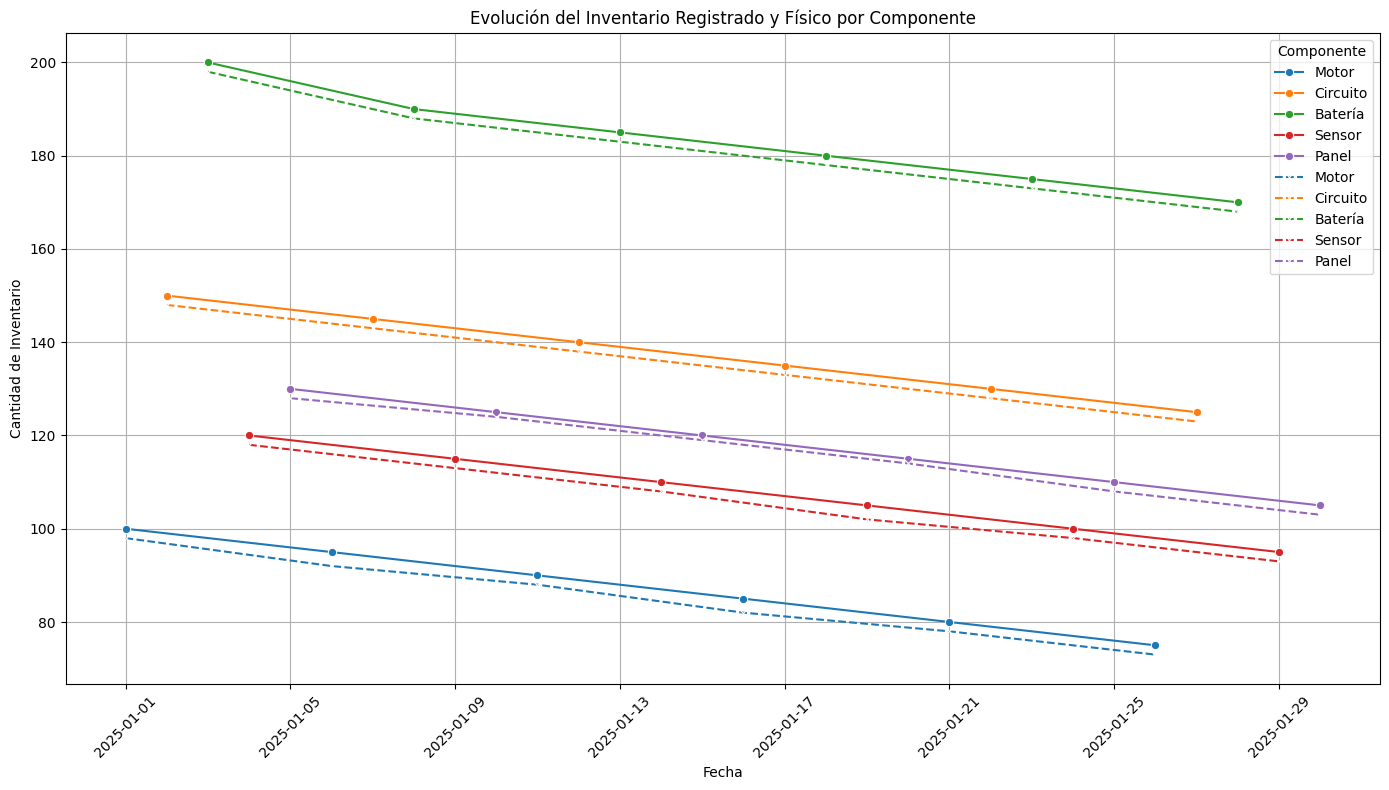

In [66]:
## grafico de lineas que muestre la evolucion del inventario registrado y físico por componente
plt.figure(figsize=(14, 8))

# Inventario Registrado
sns.lineplot(data=df, x="Fecha", y="Inventario_Registrado", hue="Componente", marker='o')

# Inventario Físico
sns.lineplot(data=df, x="Fecha", y="Inventario_Físico", hue="Componente", marker='x', linestyle='--')

plt.title("Evolución del Inventario Registrado y Físico por Componente")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Inventario")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de barras con la cantidad de alertas por componente.

##

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_41374/717163368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=alertas_bajo_stock_mes, x="Componente", y="Alertas_Bajo_Stock", palette="viridis")


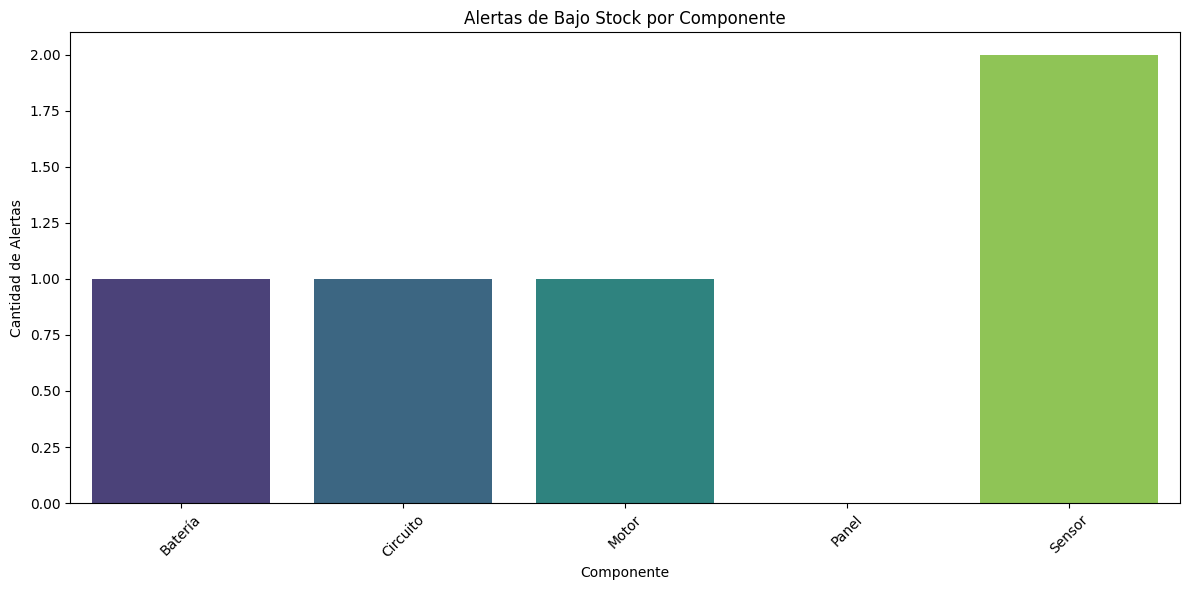

In [67]:
## grafico de barras con la cantidad de alertas de bajo stock por componente
plt.figure(figsize=(12, 6))
sns.barplot(data=alertas_bajo_stock_mes, x="Componente", y="Alertas_Bajo_Stock", palette="viridis")
plt.title("Alertas de Bajo Stock por Componente")
plt.xlabel("Componente")
plt.ylabel("Cantidad de Alertas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tabla simple con indicadores clave: promedio discrepancia de inventario, total alertas y consumo promedio.

In [70]:
## tabla simple con indicadores clave: promedio discrepancia de inventario, total alertas y consumo promedio.
indicadores_clave = pd.DataFrame({
    "Indicador": [
        "Discrepancia Promedio de Inventario",
        "Total Alertas de Bajo Stock",
        "Consumo Promedio Diario"
    ],
    "Valor": [
        componentes_discrepancia["Discrepancia_Promedio"].mean(),
        alertas_bajo_stock_mes["Alertas_Bajo_Stock"].sum(),
        consumo_promedio["Consumo_Diario"].mean()
    ]
})
print("\nIndicadores Clave:")
print(indicadores_clave.to_string(index=False))


Indicadores Clave:
                          Indicador  Valor
Discrepancia Promedio de Inventario    2.0
        Total Alertas de Bajo Stock    5.0
            Consumo Promedio Diario    3.8


## Propuesta de mejora 📈

🔍 1. Discrepancia Promedio de Inventario: 2.0 unidades
📌 Interpretación:
Esto indica que en promedio, hay una diferencia de 2 unidades entre el inventario registrado y el físico por día por componente.

✅ Mejoras recomendadas:

Auditorías semanales para componentes con discrepancia >2.
Implementar un proceso doble de validación al registrar entradas/salidas.
Automatizar alertas si la discrepancia supera el 5% del stock registrado.
Introducir códigos de escaneo o tablets para registrar salidas en tiempo real.
🔍 2. Total de Alertas de Bajo Stock: 5 alertas (concentradas en Sensor)
📌 Interpretación:
Se presentaron 5 momentos críticos donde el inventario físico cayó por debajo del mínimo esperado.

✅ Mejoras recomendadas:

Revisar el punto de reorden (reorder point) del componente Sensor.
Establecer inventario mínimo dinámico en función del consumo y lead time.
Crear un sistema de alerta automática en dashboard si quedan menos de 3 días de stock (usando consumo promedio).
Incluir al equipo de compras en el flujo de notificaciones preventivas.
🔍 3. Consumo Promedio Diario: 3.8 unidades
📌 Interpretación:
En promedio, se consumen casi 4 unidades por componente al día, aunque algunos como Batería alcanzan 5.

✅ Mejoras recomendadas:

Utilizar este valor para calcular el inventario de seguridad.
Ajustar frecuencia de reabastecimiento (por ejemplo, cada 5 días) para evitar exceso o falta de inventario.
Incorporar esta métrica en un sistema de planificación de demanda simple.
💡 Extra: Discrepancia total por componente
Componente	Discrepancia Total
Motor	14
Sensor	13
✅ Mejoras recomendadas:

Motor y Sensor deben priorizarse en el programa de control físico.
Evaluar si hay errores humanos recurrentes con estos componentes (como registros manuales mal hechos).

## 📈 Resultados clave

| Indicador                              | Valor         |
|----------------------------------------|---------------|
| Componente con mayor discrepancia      | Motor (14 u.) |
| Discrepancia promedio total            | 2.0           |
| Total de alertas de bajo stock         | 5             |
| Componente más consumido               | Batería (30 u.) |
| Consumo promedio diario                | 3.8           |